In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trainData = pd.read_csv('../kaggle-data/train.csv')
trainData['timestamp'] = pd.to_datetime(trainData.timestamp)
meterName = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}
trainData['meter'] = trainData['meter'].map(meterName)

In [3]:
trainWeatherData = pd.read_csv('../kaggle-data/weather_train.csv')
trainWeatherData['timestamp'] = pd.to_datetime(trainWeatherData.timestamp)

In [4]:
bMetaData = pd.read_csv('../kaggle-data/building_metadata.csv')

In [5]:
combDF = pd.read_csv('../data/combDF.csv')
combDF['timestamp'] = pd.to_datetime(trainWeatherData.timestamp)

In [6]:
combDF.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
1,0,1,Education,2720,2004.0,NaN,0,2016-01-01 01:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
2,0,2,Education,5376,1991.0,NaN,0,2016-01-01 02:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
3,0,3,Education,23685,2002.0,NaN,0,2016-01-01 03:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
4,0,4,Education,116607,1975.0,NaN,0,2016-01-01 04:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1


In [8]:
trainData.head()

,building_id,meter,timestamp,meter_reading
0,0,electricity,2016-01-01,0.0
1,1,electricity,2016-01-01,0.0
2,2,electricity,2016-01-01,0.0
3,3,electricity,2016-01-01,0.0
4,4,electricity,2016-01-01,0.0


In [9]:
trainData.tail()

,building_id,meter,timestamp,meter_reading
20216095,1444,electricity,2016-12-31 23:00:00,8.750
20216096,1445,electricity,2016-12-31 23:00:00,4.825
20216097,1446,electricity,2016-12-31 23:00:00,0.000
20216098,1447,electricity,2016-12-31 23:00:00,159.575
20216099,1448,electricity,2016-12-31 23:00:00,2.850


In [10]:
#all rows accounted
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int64         
 1   meter          object        
 2   timestamp      datetime64[ns]
 3   meter_reading  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 616.9+ MB


In [11]:
file = open("../data/trainData.csv")
reader = csv.reader(file)
lines= len(list(reader))

print(lines)

20216101


In [12]:
trainData['meter'].unique()

array(['electricity', 'hotwater', 'chilledwater', 'steam'], dtype=object)

In [13]:
#why do some buildings have 0 data
trainData['meter_reading'].min()

0.0

In [14]:
trainData['meter_reading'].max()

21904700.0

In [15]:
byMeterBuilding = trainData.groupby(by=['building_id','meter'])
meanEnergy = byMeterBuilding.mean().reset_index()
meanEnergy.head()

,building_id,meter,meter_reading
0,0,electricity,146.454978
1,1,electricity,74.865393
2,2,electricity,14.551385
3,3,electricity,235.549966
4,4,electricity,976.556746


# Outliers
*  Based on analysis of outliers buildings - 1099 - Steam, 778 - Chilled Water, 1021 - hotwater, 1168	- steam, 1197 - steam

In [16]:
meanEnergy['meter_reading'].max()

3813882.14776867

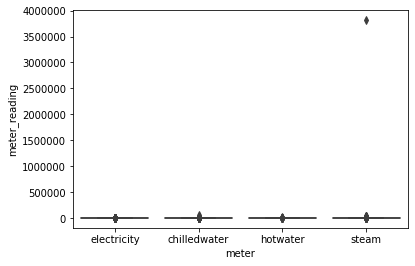

In [17]:
sns.boxplot(x='meter',y='meter_reading',data=meanEnergy)

In [18]:
# remove outlier
meanEnergyv1 = meanEnergy[meanEnergy['meter_reading']> 3800000]
meanEnergyv1

,building_id,meter,meter_reading
1598,1099,steam,3.813882e+06


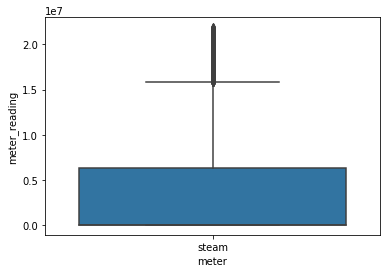

In [19]:
#steam seems to be issue, specifically building 1099
sns.boxplot(x='meter',y='meter_reading',data=trainData[(trainData.building_id == 1099) & (trainData.meter == 'steam')])

In [20]:
#probably error since education building
bMetaData[bMetaData['building_id'] == 1099]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1099,13,1099,Education,332884,NaN,NaN


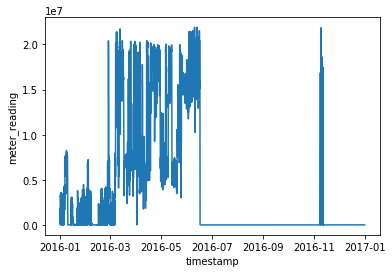

In [21]:
#looks like bad data, just remove
sns.lineplot(x="timestamp", y="meter_reading",
                          data=trainData[(trainData.building_id == 1099) & (trainData.meter == 'steam')])

In [22]:
#further investigate outlier
meanEnergyv2 = meanEnergy[meanEnergy['meter_reading']< 380000]

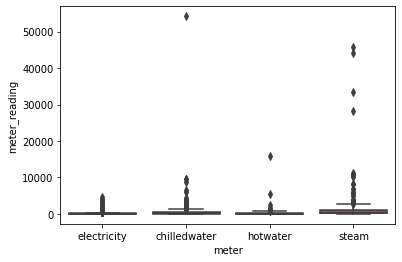

In [23]:
sns.boxplot(x='meter',y='meter_reading',data=meanEnergyv2)

In [24]:
traindataTest = trainData[(trainData.building_id != 1099) | (trainData.meter != 'steam')]
traindataTest.info

<bound method DataFrame.info of           building_id        meter           timestamp  meter_reading
0                   0  electricity 2016-01-01 00:00:00          0.000
1                   1  electricity 2016-01-01 00:00:00          0.000
2                   2  electricity 2016-01-01 00:00:00          0.000
3                   3  electricity 2016-01-01 00:00:00          0.000
4                   4  electricity 2016-01-01 00:00:00          0.000
...               ...          ...                 ...            ...
20216095         1444  electricity 2016-12-31 23:00:00          8.750
20216096         1445  electricity 2016-12-31 23:00:00          4.825
20216097         1446  electricity 2016-12-31 23:00:00          0.000
20216098         1447  electricity 2016-12-31 23:00:00        159.575
20216099         1448  electricity 2016-12-31 23:00:00          2.850

[20207316 rows x 4 columns]>

In [25]:
len(trainData[(trainData.building_id == 1099) & (trainData.meter == 'steam')])+len(trainData[(trainData.building_id != 1099) | (trainData.meter != 'steam')])


20216100

In [26]:
meanEnergyv3 = meanEnergy[meanEnergy['meter_reading']> 15000]
meanEnergyv3

,building_id,meter,meter_reading
999,778,chilledwater,5.420992e+04
1474,1021,hotwater,1.600938e+04
1598,1099,steam,3.813882e+06
1688,1148,steam,2.816571e+04
1716,1159,steam,3.343170e+04
1737,1168,steam,4.581271e+04
1789,1197,steam,4.421619e+04


In [27]:
bMetaData[bMetaData['building_id'].isin([778, 1021, 1099, 1148, 1159, 1168, 1197])]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
778,6,778,Entertainment/public assembly,108339,NaN,NaN
1021,10,1021,Entertainment/public assembly,213762,NaN,2.0
1099,13,1099,Education,332884,NaN,NaN
1148,13,1148,Office,861524,NaN,NaN
1159,13,1159,Office,671507,NaN,NaN
1168,13,1168,Office,577101,NaN,NaN
1197,13,1197,Services,50552,NaN,NaN


In [28]:
#in most cases these are on the higher end of square feel
bMetaData['square_feet'].max()

875000

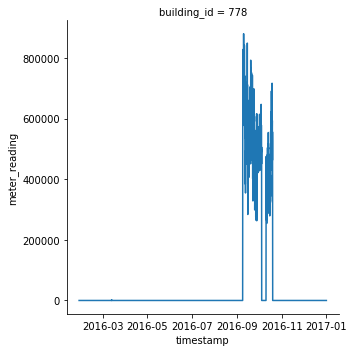

In [29]:
#bad data
#[778, 1099, 1148, 1159, 1168, 1197]
x=trainData[(trainData.building_id.isin([778])) & (trainData.meter == 'chilledwater')]
#looks like bad data, just remove
g = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

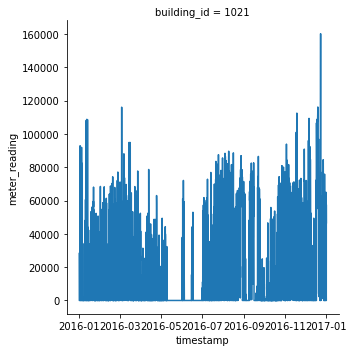

In [30]:
#need further review
#[778, 1099, 1148, 1159, 1168, 1197]
x=trainData[(trainData.building_id.isin([1021])) & (trainData.meter == 'hotwater')]
#looks like bad data, just remove
g = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

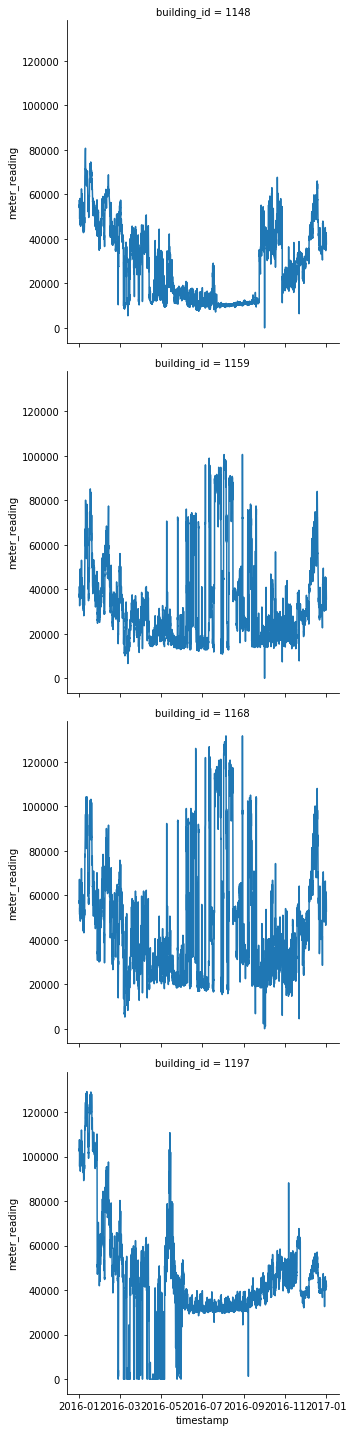

In [31]:
#dump all 1148 and 1197 look bad, other show massive spike in steam during summer
#[778, 1099, 1148, 1159, 1168, 1197]
x=trainData[(trainData.building_id.isin([1148, 1159, 1168, 1197])) & (trainData.meter == 'steam')]
#looks like bad data, just remove
g = sns.relplot(x="timestamp", y="meter_reading",
                 row="building_id",
                 kind="line", data=x)

In [32]:
traindDataTemp = trainData[(trainData['building_id'] != 1099) | (trainData['meter'] != 'steam')]

In [33]:
len(trainData)

20216100

In [34]:
byMeterBuildingCombDF = combDF.groupby(by=['building_id','primary_use','meter'])
meanEnergyCombDF = byMeterBuildingCombDF.mean().reset_index()
meanEnergyCombDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   building_id         2192 non-null   int64  
 1   primary_use         2192 non-null   object 
 2   meter               2192 non-null   object 
 3   hour                2192 non-null   float64
 4   site_id             2192 non-null   float64
 5   meter_reading       2192 non-null   float64
 6   square_feet         2192 non-null   float64
 7   air_temperature     2192 non-null   float64
 8   dew_temperature     2192 non-null   float64
 9   sea_level_pressure  2192 non-null   float64
 10  wind_direction      2192 non-null   float64
 11  wind_speed          2192 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 205.6+ KB


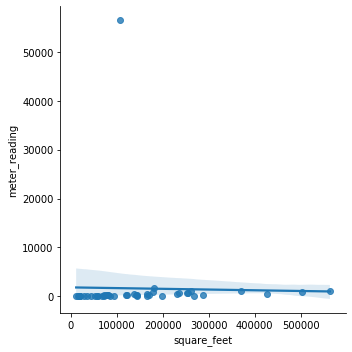

In [35]:
#['Entertainment/public assembly','Office','Education','Services']
#linear plot shows all these outliers can be removed
sns.lmplot(data=meanEnergyCombDF[(meanEnergyCombDF['meter_reading']< 380000) & (meanEnergyCombDF['primary_use'].isin(['Entertainment/public assembly'])) & (meanEnergyCombDF['meter'] == 'chilledwater')],
           x='square_feet',y='meter_reading')

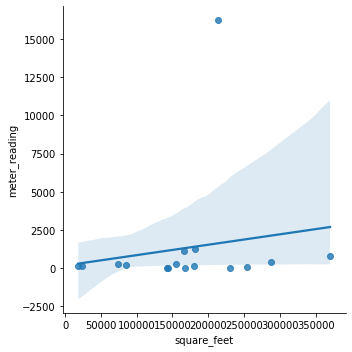

In [36]:
#['Entertainment/public assembly','Office','Education','Services']
#linear plot shows all these outliers can be removed
sns.lmplot(data=meanEnergyCombDF[(meanEnergyCombDF['meter_reading']< 380000) & (meanEnergyCombDF['primary_use'].isin(['Entertainment/public assembly'])) & (meanEnergyCombDF['meter'] == 'hotwater')],
           x='square_feet',y='meter_reading')

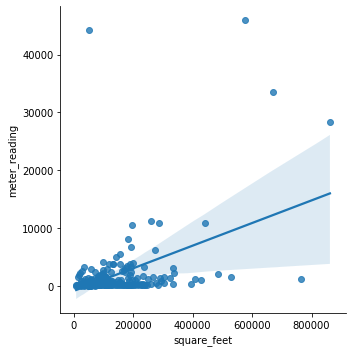

In [37]:
#['Entertainment/public assembly','Office','Education','Services']
#linear plot shows all these outliers can be removed
sns.lmplot(data=meanEnergyCombDF[(meanEnergyCombDF['meter_reading']< 380000) & (meanEnergyCombDF['primary_use'].isin(['Education','Office','Services'])) & (meanEnergyCombDF['meter'] == 'steam')],
           x='square_feet',y='meter_reading')

In [38]:
trainData['building_id'].min()

0

In [61]:
#1099 - Steam, 778 - Chilled Water, 1021 - hotwater, 1168	- steam, 1197 - steam, 1148 - steam, 1159	steam
meanEnergyCombDFv2 = meanEnergyCombDF.drop(meanEnergyCombDF[(meanEnergyCombDF['building_id'] == 1099) & (meanEnergyCombDF['meter'] == 'steam')].index)
meanEnergyCombDFv2 = meanEnergyCombDFv2.drop(meanEnergyCombDF[(meanEnergyCombDF['building_id'] == 778) & (meanEnergyCombDF['meter'] == 'chilledwater')].index)
meanEnergyCombDFv2 = meanEnergyCombDFv2.drop(meanEnergyCombDF[(meanEnergyCombDF['building_id'] == 1021) & (meanEnergyCombDF['meter'] == 'hotwater')].index)
meanEnergyCombDFv2 = meanEnergyCombDFv2.drop(meanEnergyCombDF[(meanEnergyCombDF['building_id'] == 1168) & (meanEnergyCombDF['meter'] == 'steam')].index)
meanEnergyCombDFv2 = meanEnergyCombDFv2.drop(meanEnergyCombDF[(meanEnergyCombDF['building_id'] == 1197) & (meanEnergyCombDF['meter'] == 'steam')].index)
meanEnergyCombDFv2 = meanEnergyCombDFv2.drop(meanEnergyCombDF[(meanEnergyCombDF['building_id'] == 1148) & (meanEnergyCombDF['meter'] == 'steam')].index)
meanEnergyCombDFv2 = meanEnergyCombDFv2.drop(meanEnergyCombDF[(meanEnergyCombDF['building_id'] == 1159) & (meanEnergyCombDF['meter'] == 'steam')].index)

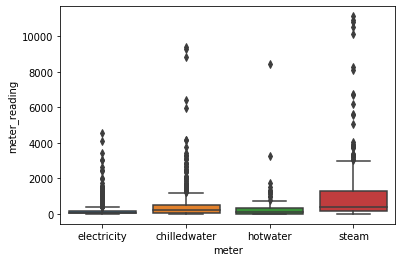

In [62]:
sns.boxplot(x='meter',y='meter_reading',data=meanEnergyCombDFv2)

C:\Users\dthoms\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


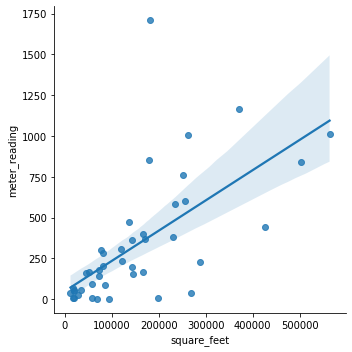

In [63]:
#['Entertainment/public assembly','Office','Education','Services']
#linear plot shows all these outliers can be removed
sns.lmplot(data=meanEnergyCombDFv2[(meanEnergyCombDFv2['meter_reading']< 380000) & (meanEnergyCombDFv2['primary_use'].isin(['Entertainment/public assembly'])) & (meanEnergyCombDF['meter'] == 'chilledwater')],
           x='square_feet',y='meter_reading')

C:\Users\dthoms\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


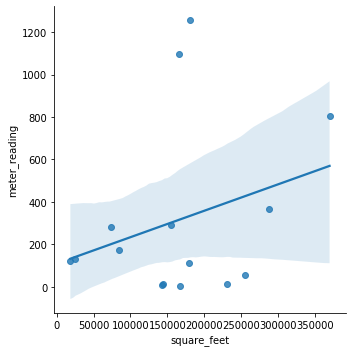

In [64]:
#['Entertainment/public assembly','Office','Education','Services']
#linear plot shows all these outliers can be removed
sns.lmplot(data=meanEnergyCombDFv2[(meanEnergyCombDFv2['meter_reading']< 380000) & (meanEnergyCombDFv2['primary_use'].isin(['Entertainment/public assembly'])) & (meanEnergyCombDF['meter'] == 'hotwater')],
           x='square_feet',y='meter_reading')

C:\Users\dthoms\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


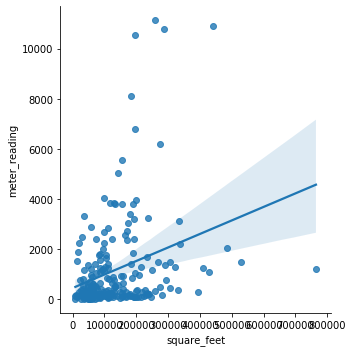

In [65]:
#['Entertainment/public assembly','Office','Education','Services']
#linear plot shows all these outliers can be removed
sns.lmplot(data=meanEnergyCombDFv2[(meanEnergyCombDFv2['meter_reading']< 380000) & (meanEnergyCombDFv2['primary_use'].isin(['Education','Office','Services'])) & (meanEnergyCombDF['meter'] == 'steam')],
           x='square_feet',y='meter_reading')